# MOwNiT 
## Laboratorium 1
### Arytmetyka komputerowa



IEEE-754 Analysis http://babbage.cs.qc.cuny.edu/IEEE-754/

In [1]:
bitstring(Float32(1.0))

"00111111100000000000000000000000"

In [2]:
bitstring(Float64(1.0))

"0011111111110000000000000000000000000000000000000000000000000000"

In [3]:
# domyślnie Float64
bitstring(1.0)

"0011111111110000000000000000000000000000000000000000000000000000"

In [4]:
# Float16
bitstring(Float16(1.0))

"0011110000000000"

In [5]:
# znak, cecha, mantysa
# uwaga - w Julii tablice indeksujemy od 1
# uwaga: ukryta jedynka nie jest pamiętana
# uwaga: cecha jest pamiętana w kodzie z nadmiarem (tutaj BIAS=127)
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(Float32(1.0))

('0', "01111111", "00000000000000000000000")

In [6]:
println(significand(Float32(1.0)), "*2^", exponent(Float32(1.0)))

1.0*2^0


In [7]:
# co ile liczby sa reprezentowane 
c=Float32[]
a=Float32(1.0)
r=1:10
for i=r
    push!(c, a)
    a=nextfloat(a)
end
map(x-> bitstring(x),c)

10-element Vector{String}:
 "00111111100000000000000000000000"
 "00111111100000000000000000000001"
 "00111111100000000000000000000010"
 "00111111100000000000000000000011"
 "00111111100000000000000000000100"
 "00111111100000000000000000000101"
 "00111111100000000000000000000110"
 "00111111100000000000000000000111"
 "00111111100000000000000000001000"
 "00111111100000000000000000001001"

In [8]:
# Maszynowe epsilon mówi, jaki jest odstęp między kolejnymi liczbami zmiennoprzecinkowymi reprezentowanymi w komputerze
eps(Float32(1))

1.1920929f-7

In [9]:
eps(Float32)

1.1920929f-7

In [10]:
# Badanie postaci zdenormalizowanej. Co się dzieje, jak liczby są coraz mniejsze?
a=Float32(1.1)
for i=1:149
    a=a/Float32(2.0)
    println(decode(a), "  ", issubnormal(a))
end

('0', "01111110", "00011001100110011001101")  false
('0', "01111101", "00011001100110011001101")  false
('0', "01111100", "00011001100110011001101")  false
('0', "01111011", "00011001100110011001101")  false
('0', "01111010", "00011001100110011001101")  false
('0', "01111001", "00011001100110011001101")  false
('0', "01111000", "00011001100110011001101")  false
('0', "01110111", "00011001100110011001101")  false
('0', "01110110", "00011001100110011001101")  false
('0', "01110101", "00011001100110011001101")  false
('0', "01110100", "00011001100110011001101")  false
('0', "01110011", "00011001100110011001101")  false
('0', "01110010", "00011001100110011001101")  false
('0', "01110001", "00011001100110011001101")  false
('0', "01110000", "00011001100110011001101")  false
('0', "01101111", "00011001100110011001101")  false
('0', "01101110", "00011001100110011001101")  false
('0', "01101101", "00011001100110011001101")  false
('0', "01101100", "00011001100110011001101")  false
('0', "01101

In [27]:
# Rysowanie wykresów
# using Pkg
# Pkg.add("Plots")
# http://docs.juliaplots.org/latest/tutorial/
using Plots

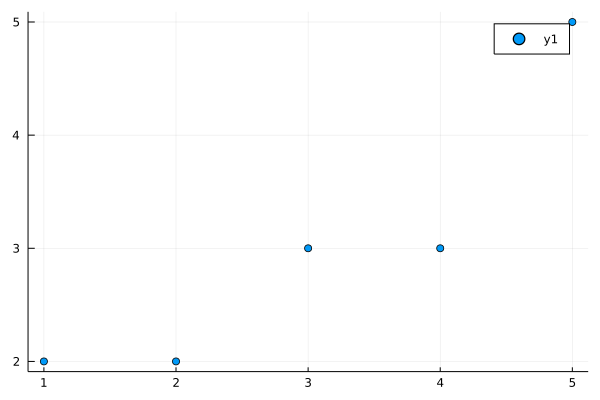

In [28]:
scatter(1:1:5, [2,2,3,3,5])

<b> Zadanie 1 </b>  Porównać w języku Julia reprezentację bitową liczby 1/3 dla Float16, Float32, Float64 oraz liczby, 
która jest inicjalizowana jako Float16, a potem rzutowana na Float64.

In [13]:
decode(x::Float16) = (b=bitstring(x); (b[1], b[2:6], b[7:16]))
decode(x::Float32) = (b=bitstring(x); (b[1], b[2:9], b[10:32]))
decode(x::Float64) = (b=bitstring(x); (b[1], b[2:12], b[13:64]))

decode (generic function with 3 methods)

In [14]:
println(bitstring(Float16(1/3)))
println(bitstring(Float32(1/3)))
println(bitstring(Float64(1/3)))

0011010101010101
00111110101010101010101010101011
0011111111010101010101010101010101010101010101010101010101010101


In [15]:
println(decode((Float16(1/3))))
println(decode(Float32(1/3)))
println(decode(Float64(1/3)))

('0', "01101", "0101010101")
('0', "01111101", "01010101010101010101011")
('0', "01111111101", "0101010101010101010101010101010101010101010101010101")


In [16]:
println(decode( Float16(5/7) ))
println(decode( convert( Float64, Float16(5/7) )))

('0', "01110", "0110110111")
('0', "01111111110", "0110110111000000000000000000000000000000000000000000")


<b>Zadanie 2</b> Zbadać, jak zmienia się odległość między kolejnymi liczbami zminnoprzecinkowymi 
reprezentowanymi w komputerze za pomocą języka Julia. 
Narysować wykres używając Plots zależności odległości od wartości liczby dla zakresu  od 1.0 do 1000000.0.

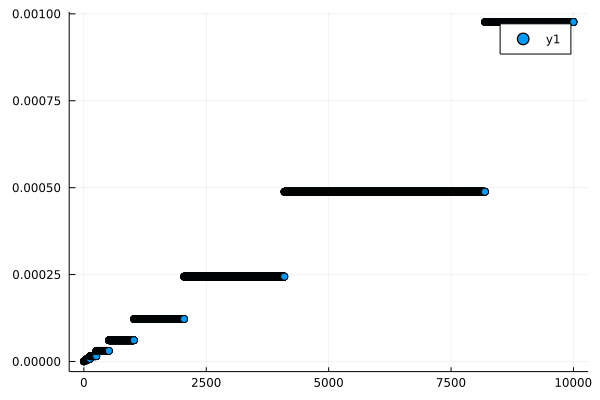

In [29]:
a1 = Float32[]
for i=1:10000
    push!(a1, eps(Float32(i))) 
end
scatter(1:10000, a1)

<b>Zadanie 3</b> Jedną z bibliotek numerycznych, jaką będziemy używać na zajęciach jest <a href="http://home.agh.edu.pl/~kzajac/dydakt/mownit/lab1/gsl.html">GSL</a> (język C). Korzystając ze <a href="https://www.gnu.org/software/gsl/doc/html/ieee754.html"> wsparcia dla wyświetlania reprezentacji liczb zmiennoprzecinkowych</a> zobaczyć jak zmienia się cecha i mantysa dla coraz mniejszych liczb. Zaobserwować, kiedy matysa przestaje być znormalizowana i dlaczego?

#### Plik .c  :

In [18]:
//
// Created by wojkly on 3/12/21.
//

#include <stdio.h>
#include <gsl/gsl_ieee_utils.h>

int main (void)
{
    float f = 1.0/3.0;

    int i = 0;
    gsl_ieee_printf_float(&f);
    printf("\n");
    while( i < 149){
        f /= 2.0;
        gsl_ieee_printf_float(&f);
        printf("\n");
        i+= 1;
    }

    return 0;
}

LoadError: syntax: "//" is not a unary operator

#### Wyniki:

In [19]:
wojkly@wojkly-mint:~/Documents/STUDIA/mownit/lab1$ gcc main.c -lgsl
wojkly@wojkly-mint:~/Documents/STUDIA/mownit/lab1$ ./a.out
 1.01010101010101010101011*2^-2 
 1.01010101010101010101011*2^-3
 1.01010101010101010101011*2^-4
 1.01010101010101010101011*2^-5
 1.01010101010101010101011*2^-6
 1.01010101010101010101011*2^-7
 1.01010101010101010101011*2^-8
 1.01010101010101010101011*2^-9
 1.01010101010101010101011*2^-10
 1.01010101010101010101011*2^-11
 1.01010101010101010101011*2^-12
 1.01010101010101010101011*2^-13
 1.01010101010101010101011*2^-14
 1.01010101010101010101011*2^-15
 1.01010101010101010101011*2^-16
 1.01010101010101010101011*2^-17
 1.01010101010101010101011*2^-18
 1.01010101010101010101011*2^-19
 1.01010101010101010101011*2^-20
 1.01010101010101010101011*2^-21
 1.01010101010101010101011*2^-22
 1.01010101010101010101011*2^-23
 1.01010101010101010101011*2^-24
 1.01010101010101010101011*2^-25
 1.01010101010101010101011*2^-26
 1.01010101010101010101011*2^-27
 1.01010101010101010101011*2^-28
 1.01010101010101010101011*2^-29
 1.01010101010101010101011*2^-30
 1.01010101010101010101011*2^-31
 1.01010101010101010101011*2^-32
 1.01010101010101010101011*2^-33
 1.01010101010101010101011*2^-34
 1.01010101010101010101011*2^-35
 1.01010101010101010101011*2^-36
 1.01010101010101010101011*2^-37
 1.01010101010101010101011*2^-38
 1.01010101010101010101011*2^-39
 1.01010101010101010101011*2^-40
 1.01010101010101010101011*2^-41
 1.01010101010101010101011*2^-42
 1.01010101010101010101011*2^-43
 1.01010101010101010101011*2^-44
 1.01010101010101010101011*2^-45
 1.01010101010101010101011*2^-46
 1.01010101010101010101011*2^-47
 1.01010101010101010101011*2^-48
 1.01010101010101010101011*2^-49
 1.01010101010101010101011*2^-50
 1.01010101010101010101011*2^-51
 1.01010101010101010101011*2^-52
 1.01010101010101010101011*2^-53
 1.01010101010101010101011*2^-54
 1.01010101010101010101011*2^-55
 1.01010101010101010101011*2^-56
 1.01010101010101010101011*2^-57
 1.01010101010101010101011*2^-58
 1.01010101010101010101011*2^-59
 1.01010101010101010101011*2^-60
 1.01010101010101010101011*2^-61
 1.01010101010101010101011*2^-62
 1.01010101010101010101011*2^-63
 1.01010101010101010101011*2^-64
 1.01010101010101010101011*2^-65
 1.01010101010101010101011*2^-66
 1.01010101010101010101011*2^-67
 1.01010101010101010101011*2^-68
 1.01010101010101010101011*2^-69
 1.01010101010101010101011*2^-70
 1.01010101010101010101011*2^-71
 1.01010101010101010101011*2^-72
 1.01010101010101010101011*2^-73
 1.01010101010101010101011*2^-74
 1.01010101010101010101011*2^-75
 1.01010101010101010101011*2^-76
 1.01010101010101010101011*2^-77
 1.01010101010101010101011*2^-78
 1.01010101010101010101011*2^-79
 1.01010101010101010101011*2^-80
 1.01010101010101010101011*2^-81
 1.01010101010101010101011*2^-82
 1.01010101010101010101011*2^-83
 1.01010101010101010101011*2^-84
 1.01010101010101010101011*2^-85
 1.01010101010101010101011*2^-86
 1.01010101010101010101011*2^-87
 1.01010101010101010101011*2^-88
 1.01010101010101010101011*2^-89
 1.01010101010101010101011*2^-90
 1.01010101010101010101011*2^-91
 1.01010101010101010101011*2^-92
 1.01010101010101010101011*2^-93
 1.01010101010101010101011*2^-94
 1.01010101010101010101011*2^-95
 1.01010101010101010101011*2^-96
 1.01010101010101010101011*2^-97
 1.01010101010101010101011*2^-98
 1.01010101010101010101011*2^-99
 1.01010101010101010101011*2^-100
 1.01010101010101010101011*2^-101
 1.01010101010101010101011*2^-102
 1.01010101010101010101011*2^-103
 1.01010101010101010101011*2^-104
 1.01010101010101010101011*2^-105
 1.01010101010101010101011*2^-106
 1.01010101010101010101011*2^-107
 1.01010101010101010101011*2^-108
 1.01010101010101010101011*2^-109
 1.01010101010101010101011*2^-110
 1.01010101010101010101011*2^-111
 1.01010101010101010101011*2^-112
 1.01010101010101010101011*2^-113
 1.01010101010101010101011*2^-114
 1.01010101010101010101011*2^-115
 1.01010101010101010101011*2^-116
 1.01010101010101010101011*2^-117
 1.01010101010101010101011*2^-118
 1.01010101010101010101011*2^-119
 1.01010101010101010101011*2^-120
 1.01010101010101010101011*2^-121
 1.01010101010101010101011*2^-122
 1.01010101010101010101011*2^-123
 1.01010101010101010101011*2^-124
 1.01010101010101010101011*2^-125
 1.01010101010101010101011*2^-126
 0.10101010101010101010110*2^-126
 0.01010101010101010101011*2^-126
 0.00101010101010101010110*2^-126
 0.00010101010101010101011*2^-126
 0.00001010101010101010110*2^-126
 0.00000101010101010101011*2^-126
 0.00000010101010101010110*2^-126
 0.00000001010101010101011*2^-126
 0.00000000101010101010110*2^-126
 0.00000000010101010101011*2^-126
 0.00000000001010101010110*2^-126
 0.00000000000101010101011*2^-126
 0.00000000000010101010110*2^-126
 0.00000000000001010101011*2^-126
 0.00000000000000101010110*2^-126
 0.00000000000000010101011*2^-126
 0.00000000000000001010110*2^-126
 0.00000000000000000101011*2^-126
 0.00000000000000000010110*2^-126
 0.00000000000000000001011*2^-126
 0.00000000000000000000110*2^-126
 0.00000000000000000000011*2^-126
 0.00000000000000000000010*2^-126
 0.00000000000000000000001*2^-126
 0

LoadError: syntax: extra token "@" after end of expression

<b>Zadanie 4</b> Na przykładzie wybranego algorytmu niestabilnego numerycznie: 
1. Pokazać, że działa źle.
2. Pokazać które konkretnie działania powodują zwiększenie błędu (np. dzielenie przez małą liczbę, cancellation).
3. Zademonstować wersję stabilną.

Wszystkie punkty przedstawić w postaci notatnika Julii.

#### ad. 4

Przykładem algorytmu niestabilnego numerycznie jest aproksymacja wartości funkcji $ e^x $ poprzez sumę szeregu Taylora:
$$
 e^x = 1 + x +\frac{x^2}{2!} + \frac{x^3}{3!} + \frac{x^4}{4!} + ...
$$

Sprawdźmy, co nastąpi w przypadku, gdy będziemy chcieli obliczyć wartość funkcji dla ujemnego x, na przykład dla x = -5.5, dla 30 wyrazów szeregu

In [20]:
function count_ex_print(elements, x)
    local result::Float16 = 0
    for i=0:elements
        result +=  x^i / factorial(big(i))
        println("Adding:  ", x^i / factorial(big(i)))
    end
    return result
end

count_ex_print (generic function with 1 method)

In [21]:
x = -5.5
res1 = count_ex_print(30, x)
println()
println("my aproximation:  " , res1)
println("real value:       " , exp(x))
println();
println("diff:             " , abs( res1 - exp(x) ) )
println();
println("error:             " , abs( res1 - exp(x) / exp(x))," %" )

Adding:  1.0
Adding:  -5.5
Adding:  15.125
Adding:  -27.72916666666666666666666666666666666666666666666666666666666666666666666666657
Adding:  38.12760416666666666666666666666666666666666666666666666666666666666666666666685
Adding:  -41.94036458333333333333333333333333333333333333333333333333333333333333333333337
Adding:  38.44533420138888888888888888888888888888888888888888888888888888888888888888888
Adding:  -30.20704830109126984126984126984126984126984126984126984126984126984126984126983
Adding:  20.76734570700024801587301587301587301587301587301587301587301587301587301587292
Adding:  -12.69115570983348489858906525573192239858906525573192239858906525573192239858909
Adding:  6.98013564040841669422398589065255731922398589065255731922398589065255731922399
Adding:  -3.490067820204208347111992945326278659611992945326278659611992945326278659611995
Adding:  1.599614417593595492426330099941211052322163433274544385655496766607877718988825
Adding:  -0.67675994590498270833421658074435852213629

Jak widać, różnica pomiędzy prawdziwą wartością a aproksymacją jest znacząca, a kolejne składniki, są rzędu $ 2 ^{-11} $ i zmniejszają się , zatem nie wpłyną one już na poprawę wyniku

W powyższym algorytmie przyczyną znacznego błędu jest tzw. catastrophic cancellation

Jest ona spowodowana odejmowaniem bliskich liczb. Wynikiem takich odejmowań są małe liczby. Gdy te liczby są normalizowane, mantysę przesuwamy w lewo, a pojawiające się miejsca po prawej są zastępywane przez zera lub losowe wartości.

Aby usunąć przyczynę błędu, wystarczy zastosować proste przeksztalcenie. Dla ujemnych wartości x wartość funkcji $ e^x $ będę liczył w następujący sposób:
$$
e^x = \frac{1}{e^{-x}}
$$
W ten sposób wyeliminuję odejmowanie, ktore zniekształca wynik

Dla x = -5.5 otrzymam:
$$
e^{5.5} = \frac{1}{1 + 5.5 + 15.125 + 27.729 + ...}
$$

In [22]:
function count_ex(elements, x)
    local result::Float16 = 0
    for i=0:elements
        result +=  x^i / factorial(big(i))
    end
    return result
end

count_ex (generic function with 1 method)

Otrzymana wartość:

In [23]:
1/count_ex(30,5.5)

Float16(0.004086)

In [24]:
abs( 1/count_ex(30,5.5) - exp(-5.5) )

1.230666979691597e-6

In [25]:
println("my aproximation:  " , 1/count_ex(30,5.5))
println("real value:       " , exp(-5.5))
println();
println("diff:             " , abs( 1/count_ex(30,5.5) - exp(-5.5)) )
println();
println("error:             " , abs( (1/count_ex(30,5.5) - exp(-5.5)) / exp(-5.5))," %" )

my aproximation:  0.004086
real value:       0.004086771438464067

diff:             1.230666979691597e-6

error:             0.000301134281234509 %


Po zmianie algorytmu otrzymana wartość różni się jedynie od poprawnej o liczbę rzędu $ 10^{-6} $
Rząd wielkości błędu względnego zmalał również z ok. $ 0.998 \% $  do ok. $ 0.00030 \% $  , co świadczy o znaczącej poprawie dokładności algorytmu.